In [18]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Get content from the Google Docs published URL
url = "https://docs.google.com/document/d/e/2PACX-1vRMx5YQlZNa3ra8dYYxmv-QIQ3YJe8tbI3kqcuC7lQiZm-CSEznKfN_HYNSpoXcZIV3Y_O3YoUB1ecq/pub?embedded=true"
response = requests.get(url)

# Step 2: Parse with BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Step 3: Extract all text elements from <p> tags in order
tokens = []
for p in soup.find_all("p"):
    for span in p.find_all("span"):
        text = span.get_text(strip=True)
        if text:
            tokens.append(text)

# Step 4: Convert to triplets (x, Character, y)
data = []
i = 0
while i + 2 < len(tokens):
    try:
        x = int(tokens[i])
        char = tokens[i + 1]
        y = int(tokens[i + 2])
        data.append((x, char, y))
        i += 3
    except ValueError:
        i += 1  # Skip malformed entries

# Step 5: Create DataFrame
df = pd.DataFrame(data, columns=["x-coordinate", "Character", "y-coordinate"])

# Step 6: Display result
print(df)
print(df.head())

   x-coordinate Character  y-coordinate
0             0         █             0
1             0         █             1
2             0         █             2
3             1         ▀             1
4             1         ▀             2
5             2         ▀             1
6             2         ▀             2
7             3         ▀             2
   x-coordinate Character  y-coordinate
0             0         █             0
1             0         █             1
2             0         █             2
3             1         ▀             1
4             1         ▀             2


<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 5px; margin-top: 20px; border: 1px solid #b8daff;"
>
<p>
🔍 Explanation:
	•	The document likely presents values like 0 █ 0 0 █ 1 0 █ 2 in a long line.
	•	The regex (\d+)\s*(\S)\s*(\d+) matches:
	•	an integer (\d+)
	•	followed by a non-whitespace character (\S)
	•	followed by another integer

🧪 Example Match: </p>

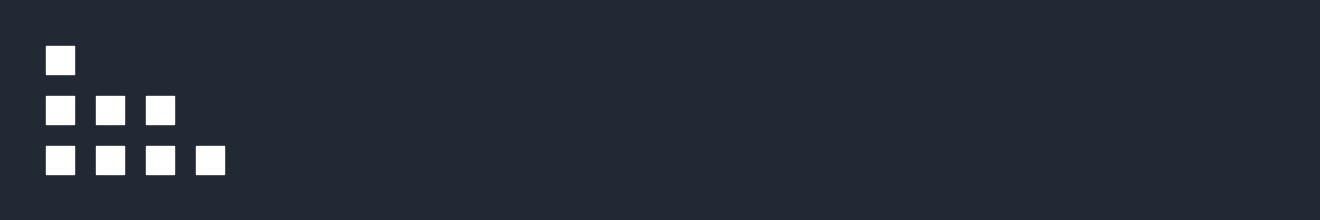

In [ ]:
import matplotlib.pyplot as plt

# --- Create the Plot ---

# Define a dark color for the background
dark_color = '#212934'

# Create a figure with a very wide aspect ratio
fig, ax = plt.subplots(figsize=(15, 2))
fig.patch.set_facecolor(dark_color)  # Set the face color of the figure
ax.set_facecolor(dark_color)         # Set the face color of the axes
ax.set_facecolor(dark_color)

# Create the scatter plot using your DataFrame
ax.scatter(
    x=df['x-coordinate'],
    y=df['y-coordinate'],
    marker='s',      # Square markers
    s=400,           # Marker size
    color='white'    # White marker color
)

# --- Final Touches ---

# Invert the y-axis so (0,0) is at the top-left
ax.invert_yaxis()

# Ensure the markers remain square
ax.set_aspect('equal', adjustable='box')

# Adjust plot limits to place the shape on the far left
# and create empty space on the right.
ax.set_xlim(-1, 25)
ax.set_ylim(3, -1)

# Hide the axis lines, labels, and ticks
ax.axis('off')

# Use a tight layout with no padding
plt.tight_layout(pad=0)
plt.show()
